## Global Weather Trends
### --Chaojun Cao 

- The global temperature is a hot top nowadays. To find out the temperature change over the years for my hometown as well as for the whole world, I try to use the moving average method to display a more smooth line chart, so we can compare the changes easier. 

- To access the datasets, city_data, city_list, global_data,which are stored as csv file, I used SQL queries to query the datasets from database and then download them to my local drive. 

- Here is the SQL code for accessing the datasets.


In [ ]:
select * from city_data;
select * from city_list;
select * from global_data;

### After the datasets are ready, the plan is load the datasets into Jupyter Notebook and start the exploration and visualization with the below steps:  
- 1) import the libraries that will be needed in the analysis. 
- 2) check and clean the dataset. Print out a couple of rows of the data, display some attributes of the data to get a general idea of the data and try to find out some problems that in the data. 
- 3) data wrangling. Use proper method to deal with some issues of the data, like deal with null values, title names with spaces or uppercases that are not very convenient for us to do the further analysis. 
- 4) plot the trend lines before we using simple moving average method to smooth our data. 
- 5) prepare the 10 year moving average data for the city close to my hometown and for the global temperature
- 6) visualize the 10 year moving average charts and find the trends and other features of the charts

#### Import the libraries and read in the datasets 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
df_city=pd.read_csv('city_data.csv')
df_clist=pd.read_csv('city_list.csv')
df_global=pd.read_csv('global_data.csv')

#### Check the properties of the datasets

In [4]:
print('the shape of city_data is :', df_city.shape)
print('the shape of city_list is :', df_clist.shape)
print('the shape of global_data is :', df_global.shape)

the shape of city_data is : (71311, 4)
the shape of city_list is : (345, 2)
the shape of global_data is : (266, 2)


In [5]:
df_city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71311 entries, 0 to 71310
Data columns (total 4 columns):
year        71311 non-null int64
city        71311 non-null object
country     71311 non-null object
avg_temp    68764 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 2.2+ MB


In [6]:
df_clist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 345 entries, 0 to 344
Data columns (total 2 columns):
city       345 non-null object
country    345 non-null object
dtypes: object(2)
memory usage: 5.5+ KB


In [7]:
df_global.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 2 columns):
year        266 non-null int64
avg_temp    266 non-null float64
dtypes: float64(1), int64(1)
memory usage: 4.3 KB


In [8]:
df_city.country.unique()==df_clist.country.unique()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

From the three datasets, we can see that the city_data and city_list data are pretty consistent, but we have a lot of null values 
in the city_data for the average temperature column. This missing value will affect our result, since we are interested in the average temperature change, 
it is not proper to replace the null with any actual value, so we can drop the rows that without a temperature record. 

In [9]:
df_city.dropna(subset=['avg_temp'], axis=0, inplace=True)
df_city.shape

(68764, 4)

In [10]:
df_city.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68764 entries, 0 to 71310
Data columns (total 4 columns):
year        68764 non-null int64
city        68764 non-null object
country     68764 non-null object
avg_temp    68764 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 2.6+ MB


In [11]:
print('the unique country in record:', df_city.country.nunique())
print('the unique city in record:', df_city.city.nunique())

the unique country in record: 137
the unique city in record: 332


### Let's have a general picture of the global average temperature trends over the past 266 years. 

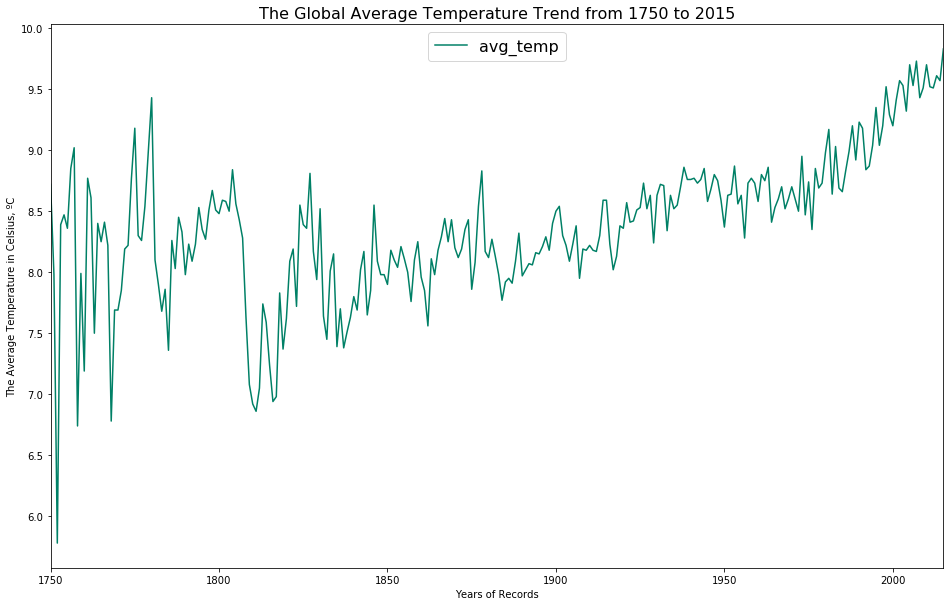

In [13]:
df_global.plot(kind='line', x='year', y='avg_temp', figsize=(16, 10), colormap='summer')
plt.title('The Global Average Temperature Trend from 1750 to 2015', fontsize=16)
plt.xlabel('Years of Records')
plt.ylabel('The Average Temperature in Celsius, ºC')
plt.legend(loc='upper center',fontsize=16)

#### Observation 1: 
    From the line chart above, we can see that the global average temperature is very volatile over the years. We have 266 year's data in one chart, it is a lot of data. we can see a general direction of the trend line, but we care more about the changes over the 200 years instead of year-by-year, so we can do further analysis to smooth the line chart. 

In [14]:
df_China=df_city.query('country=="China" & city=="Nanchang"')
df_China.sample(n=5)

,year,city,country,avg_temp
44900,1921,Nanchang,China,17.39
44952,1973,Nanchang,China,17.76
44824,1845,Nanchang,China,16.81
44946,1967,Nanchang,China,17.52
44956,1977,Nanchang,China,17.57


To find out the globle teperature data in record that in the same year as Nanchang, so we can compare the changes for both in the same year

In [15]:
df_China_global = df_China.merge(df_global, how='left', on='year')
df_China_global.head()

,year,city,country,avg_temp_x,avg_temp_y
0,1841,Nanchang,China,16.58,7.69
1,1842,Nanchang,China,16.96,8.02
2,1843,Nanchang,China,17.06,8.17
3,1844,Nanchang,China,16.78,7.65
4,1845,Nanchang,China,16.81,7.85


In [16]:
df_China_global.shape

(173, 5)

In [17]:
df_China_global.rename(columns={'avg_temp_x':'avg_temp_NanChang', 'avg_temp_y':'avg_temp_global'}, inplace=True)

In [18]:
df_China_global.drop(['city', 'country'], axis=1, inplace=True)
df_China_global.head()

,year,avg_temp_NanChang,avg_temp_global
0,1841,16.58,7.69
1,1842,16.96,8.02
2,1843,17.06,8.17
3,1844,16.78,7.65
4,1845,16.81,7.85


In [19]:
df_China_global.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 173 entries, 0 to 172
Data columns (total 3 columns):
year                 173 non-null int64
avg_temp_NanChang    173 non-null float64
avg_temp_global      173 non-null float64
dtypes: float64(2), int64(1)
memory usage: 5.4 KB


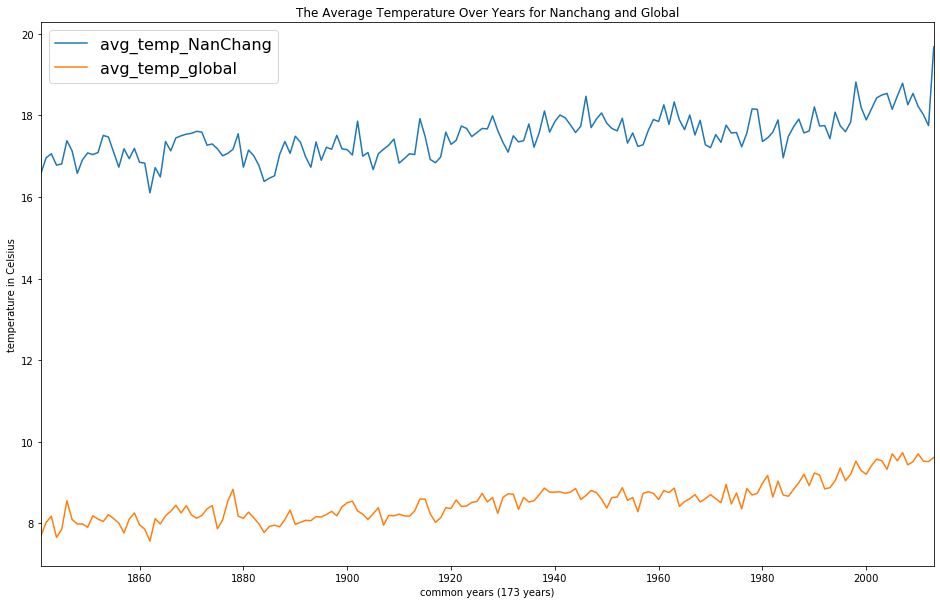

In [20]:
df_China_global.plot(kind='line', x='year', title='The Average Temperature Over Years for Nanchang and Global', figsize=(16, 10))
plt.ylabel('temperature in Celsius')
plt.xlabel('common years (173 years)')
plt.legend(loc='upper left',fontsize=16)

#### Observation 2:
    With 173 year's data in record, and plot all the records for the two line chart, we can see that the two curve lines both have a upward trend and with an approximately same changing rate. We can plot a 10 year moving average trends to verify it. 
    

Using functions in numpy to define a MoveAverage function to smooth the data

In [25]:
import numpy as np
dataset1=df_China_global.avg_temp_NanChang

def MoveAverage(values, window):
    weights=np.repeat(1.0, window)/window
    smas=np.convolve(values, weights, 'valid')
    return smas
print(MoveAverage(dataset1, 10))

[16.927 16.973 16.986 17.031 17.1   17.129 17.064 17.069 17.105 17.133
 17.11  17.089 16.99  16.911 16.813 16.839 16.879 16.906 16.962 16.997
 17.068 17.146 17.295 17.35  17.431 17.413 17.401 17.363 17.33  17.331
 17.248 17.202 17.144 17.094 17.002 16.93  16.881 16.879 16.898 16.85
 16.926 16.945 16.942 16.938 17.035 17.079 17.149 17.161 17.176 17.187
 17.154 17.123 17.211 17.238 17.212 17.189 17.173 17.173 17.149 17.173
 17.14  17.131 17.051 17.055 17.138 17.22  17.206 17.173 17.144 17.161
 17.207 17.252 17.32  17.384 17.34  17.349 17.425 17.508 17.609 17.613
 17.618 17.589 17.565 17.532 17.522 17.543 17.497 17.488 17.5   17.496
 17.547 17.638 17.682 17.724 17.744 17.739 17.864 17.876 17.856 17.903
 17.899 17.866 17.834 17.85  17.824 17.807 17.684 17.642 17.614 17.598
 17.602 17.66  17.676 17.716 17.773 17.781 17.858 17.882 17.907 17.845
 17.781 17.708 17.664 17.607 17.575 17.568 17.49  17.495 17.523 17.61
 17.625 17.617 17.642 17.655 17.594 17.585 17.634 17.668 17.609 17.556
 17.641 

In [26]:
Nan_MA=pd.DataFrame(MoveAverage(dataset1, 10))

In [27]:
Nan_MA.shape

(164, 1)

In [28]:
dataset2=df_China_global.avg_temp_global

def MoveAverage(values, window):
    weights=np.repeat(1.0, window)/window
    smas=np.convolve(values, weights, 'valid')
    return smas
print(MoveAverage(dataset2, 10))

[7.988 8.037 8.045 8.032 8.088 8.114 8.059 8.026 8.038 8.065 8.071 8.038
 7.984 7.991 7.968 7.975 8.004 8.072 8.087 8.105 8.129 8.156 8.219 8.243
 8.288 8.256 8.235 8.245 8.303 8.277 8.269 8.284 8.278 8.241 8.175 8.181
 8.168 8.105 8.031 8.046 8.031 8.006 8.    8.008 8.047 8.07  8.096 8.134
 8.143 8.151 8.204 8.256 8.279 8.295 8.288 8.296 8.313 8.279 8.28  8.258
 8.23  8.194 8.181 8.189 8.239 8.275 8.26  8.267 8.261 8.281 8.295 8.334
 8.358 8.37  8.362 8.356 8.406 8.456 8.506 8.492 8.519 8.534 8.564 8.556
 8.568 8.567 8.549 8.567 8.59  8.642 8.655 8.66  8.662 8.704 8.726 8.732
 8.745 8.755 8.744 8.727 8.688 8.674 8.665 8.676 8.647 8.652 8.612 8.605
 8.607 8.621 8.642 8.659 8.67  8.669 8.654 8.644 8.676 8.673 8.648 8.635
 8.647 8.627 8.602 8.611 8.617 8.638 8.613 8.628 8.645 8.658 8.686 8.743
 8.757 8.765 8.787 8.779 8.827 8.841 8.892 8.911 8.936 8.937 8.957 8.941
 8.976 9.045 9.066 9.087 9.119 9.156 9.153 9.176 9.249 9.315 9.343 9.378
 9.427 9.48  9.471 9.493 9.543 9.554 9.548 9.556]


In [29]:
Nan_MA=pd.DataFrame(MoveAverage(dataset1, 10), index=df_China_global.year[9:])
Nan_MA.rename(columns={0:'MA_global'},inplace=True)

In [30]:
Global_MA=pd.DataFrame(MoveAverage(dataset2, 10), index=df_China_global.year[9:])
Global_MA.rename(columns={0:'MA_NanChang'}, inplace=True)

In [31]:
Nan_Glo_MA =Nan_MA.merge(Global_MA, how='inner', on='year')
Nan_Glo_MA.head()

,MA_global,MA_NanChang
year,,
1850,16.927,7.988
1851,16.973,8.037
1852,16.986,8.045
1853,17.031,8.032
1854,17.100,8.088


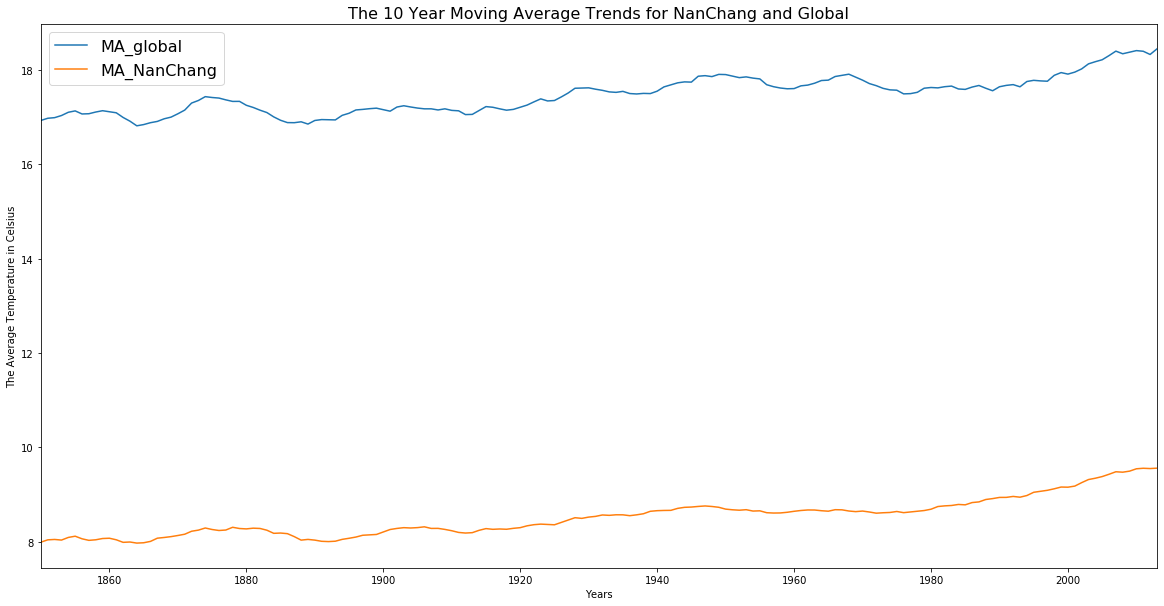

In [32]:
Nan_Glo_MA.plot(kind='line', figsize=(20, 10))
plt.title('The 10 Year Moving Average Trends for NanChang and Global', fontsize=16)
plt.xlabel('Years')
plt.ylabel('The Average Temperature in Celsius')
plt.legend(loc='best', fontsize=16)

### Observation 3: 
    After we smoothed the data, we can see both the local temperature and the global temperature are in a increasing change trend. NanChange's overall yearly average temperature has been increasing from around 1 Celsius to 2 Celsius, and the trend showing that the temperature will continue increasing in the future, and the same trend applies to the global average temperature. 

### Observation 4:
    The two trend lines above are in approximately parallel trend, means that the local temperature changing rate and the global temperature changing rate are almost the same. So global warming is not a average number, it is the contributes from all the local temperature increasing. Every local city is warming up, and this makes global warming up. 

### Conclusion:
We have over two-hundred years weather data in record and the analysis on these data showing that the average temperature has been increasing, no matter from locally or globally. We used data from local big city and compared the pattern with global data. After using Moving Average calculation to smooth the trend, the comparison is more  According to the similar pattern, we can tell that the temperature of the local cities and global are changing with similar rate simultaneously. 